# Getting Data

In [1]:
from collections import Counter
import math, random, csv, json, re

from bs4 import BeautifulSoup
import requests

If some module is not installed, for example, beautifulsoup,
- googling: anaconda how to install beautifulsoup
- Find anaconda cloud in google answer, where the modules are tested and safe.

As a data scientist you will spend an **embarrassingly large fraction of your time** 
- acquiring, 
- cleaning, 
- and transforming data. 

## stdin and stdout

### Number of lines containing numbers
- You could then use these to count how many lines of a file contain numbers.
- you can pipe data through them using sys.stdin and sys.stdout .

In [7]:
# egrep.py
import sys, re

# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]

# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

In [3]:
# line_count.py
import sys

count = 0
for line in sys.stdin:
    count += 1
    
# print goes to sys.stdout
print(count)

0


In [8]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: D46B-D794

 C:\Users\user\Downloads 디렉터리

2020-05-15  오전 12:12    <DIR>          .
2020-05-15  오전 12:12    <DIR>          ..
2018-09-10  오후 09:36            22,016 %282018-2%29_교양영어 평화반 공통Syllabus.hwp
2018-09-07  오후 02:09           409,830 %5B0906%5D컴퓨터프로그래밍및실습1-과제포함.pdf
2018-09-06  오전 11:39           300,234 %5B0906%5D컴퓨터프로그래밍및실습1.pdf
2018-09-14  오후 05:52           790,378 %5B0913%5D컴퓨터프로그래밍및실습2-과제포함.pdf
2018-09-13  오전 11:21           727,861 %5B0913%5D컴퓨터프로그래밍및실습2.pdf
2018-09-20  오전 11:33           549,628 %5B0920%5D컴퓨터프로그래밍및실습3.pdf
2018-09-28  오후 10:39         1,090,648 %5B0927%5D컴퓨터프로그래밍및실습4-과제포함.pdf
2018-10-01  오후 11:56         1,114,032 %5B0927%5D컴퓨터프로그래밍및실습4-과제포함_2.pdf
2018-09-27  오전 11:30         1,009,874 %5B0927%5D컴퓨터프로그래밍및실습4.pdf
2018-10-04  오전 11:31           537,334 %5B1004%5D컴퓨터프로그래밍및실습5.pdf
2018-10-13  오후 07:31         1,020,607 %5B1011%5D컴퓨터프로그래밍및실습6-과제포함.pdf
2018-10-11  오전 11:34           808,326 %5B1011%5D컴퓨터프로그래밍및실습6.pdf
2018-10-18 

In [4]:
# windows 

!type the_bible.txt | python egrep.py "[0-9]" | python line_count.py

지정된 파일을 찾을 수 없습니다.
python: can't open file 'egrep.py': [Errno 2] No such file or directory
python: can't open file 'line_count.py': [Errno 2] No such file or directory


### Most Common Words

- a script that counts the words in its input and writes out the most common ones

In [5]:
import sys
from collections import Counter

# pass in number of words as first argument
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1)

counter = Counter(word.lower()                        # non-zero exit code indicates error
                  for line in sys.stdin               # lowercase words
                  for word in line.strip().split()    # split on spaces
                  if word)                            # skip empty 'words'

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



usage: most_common_words.py num_words
Traceback (most recent call last):
  File "<ipython-input-5-29ce76b37d99>", line 6, in <module>
    num_words = int(sys.argv[1])
ValueError: invalid literal for int() with base 10: '-f'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user\Anaconda2020\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-29ce76b37d99>", line 9, in <module>
    sys.exit(1)
SystemExit: 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user\Anaconda2020\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\user\Anaconda2020\lib\site-packages\IPython\core\ultratb.py", line 319, in wrapped
    return f(*args, **kwargs

SystemExit: 1

C:\Users\user\Anaconda2020\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# windows

!type the_bible.txt | python most_common_words.py 10

## Reading Files

### The Basics of Text Files

In [9]:
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r')

# 'w' is write—will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append—for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

# don't forget to close your files when you're done
file_for_writing.close()

FileNotFoundError: [Errno 2] No such file or directory: 'reading_file.txt'

Because it is easy to forget to close your files, you should always use them in a **with**
block, at the end of which they will be **closed automatically**

In [10]:
with open(filename,'r') as f:
    data = function_that_gets_data_from(f)

# at this point f has already been closed, so don't try to use it
process(data)

NameError: name 'filename' is not defined

In [11]:
starts_with_numbers = 0

with open('the_bible.txt','r') as file:
    for line in file:                 # look at each line in the file
        if re.match("^[0-9]", line):       # use a regex to see if it starts with '#'
            starts_with_numbers += 1     # if it does, add 1 to the count
            
starts_with_numbers

FileNotFoundError: [Errno 2] No such file or directory: 'the_bible.txt'

In [12]:
def get_domain(email_address):
    """split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)

FileNotFoundError: [Errno 2] No such file or directory: 'email_addresses.txt'

### Delimited Files

- csv file : These files are very often either comma-separated or tab-separated.

In [13]:
!type tab_delimited_stock_prices.txt

지정된 파일을 찾을 수 없습니다.


In [ ]:
import csv
with open('tab_delimited_stock_prices.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        print(date, symbol, closing_price)

In [ ]:
!type colon_delimited_stock_prices.txt

In [ ]:
with open('colon_delimited_stock_prices.txt', 'r') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        print(date, symbol, closing_price)

In [ ]:
!type comma_delimited_stock_prices_1.txt

In [ ]:
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

with open('comma_delimited_stock_prices_1.txt','w') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])

In [ ]:
!type bad_csv.txt

In [ ]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

# don't do this!
with open('bad_csv.txt', 'w') as f:
    for row in results:
        f.write(",".join(map(str, row))) # might have too many commas in it!
        f.write("\n")                    # row might have newlines as well!

## Scraping the Web

- Another way to get data is by scraping it from web pages

### HTML and Parsing

- for python3:
    - pip install html5lib
    - pip install beautifulsoup4

- for anaconda
    - conda install -c anaconda html5lib
         - https://anaconda.org/anaconda/html5lib
    - conda install -c anaconda beautifulsoup4
        - https://anaconda.org/anaconda/beautifulsoup4

<img src="https://www.researchgate.net/profile/Olfa_Nasraoui/publication/221417012/figure/download/fig2/AS:669043992322053@1536523926785/Dom-Tree-of-An-Example-Web-Page.png">

<body>
    <h1>DOM Lesson one</h1>
    <p>Hello World!</p>
    <table>
        <tr class="people">
            <td>John</td>
            <td>Doe</td>
            <td>Alaska</td>
        </tr>
    </table>
</body>

In [2]:
from bs4 import BeautifulSoup

html = """
<html>
  <head>
    <title>A web page</title>
  </head>
  <body>
    <p id="author">Joel Grus</p>
    <p id="subject">Data Science</p>
    <p class="price">30</p>
  </body>
</html>"""
soup = BeautifulSoup(html, 'html5lib')

Query 1: Find **title**

In [3]:
soup.title.text

'A web page'

Query 2: Find **title**'s **text**

In [4]:
soup.title.text

'A web page'

Query 3: Find **p** of **body**

In [5]:
soup.body.p

<p id="author">Joel Grus</p>

Query 4: Find all **p** under **body**

In [6]:
soup.body('p')

[<p id="author">Joel Grus</p>,
 <p id="subject">Data Science</p>,
 <p class="price">30</p>]

Query 5: Find second **p**'s **text** of **body**

In [7]:
soup.body('p')[1].text

'Data Science'

In [16]:
soup.body('p')[1]

<p id="subject">Data Science</p>

Query 6: Find last **p** of **body**

In [12]:
soup.body('p')[-1]

<p class="price">30</p>

Query 7: Loop over all **p** of **body**

In [13]:
for i, p in enumerate(soup.body('p')):
    print('paragraph {}: {}'.format(i, p.text))

paragraph 0: Joel Grus
paragraph 1: Data Science
paragraph 2: 30


Query 8: Find first **p**'s **id** attribute's value

In [17]:
soup.p['id']

'author'

In [18]:
soup.p['id'][1]

'u'

Query 9: Find all **p** whose attribute **id** is 'author'

In [19]:
soup('p', {'id':'author'})

[<p id="author">Joel Grus</p>]

In [23]:
soup('p', {'id':'subject'})

[<p id="subject">Data Science</p>]

Query 10: Find all **p** whose attribute **class** is 'price'

In [22]:
soup('p', 'price')
#soup('p', {'class':'price'})

[<p class="price">30</p>]

Query 11: Find all **text**s

In [24]:
soup.text

'\n    A web page\n  \n  \n    Joel Grus\n    Data Science\n    30\n  \n'

In [25]:
first_paragraph = soup.find('p')     # or just soup.p
print(first_paragraph)
print(type(first_paragraph))

<p id="author">Joel Grus</p>
<class 'bs4.element.Tag'>


In [26]:
soup.p

<p id="author">Joel Grus</p>

In [27]:
first_paragraph_text = soup.p.text
first_paragraph_text

'Joel Grus'

In [28]:
first_paragraph_words = soup.p.text.split()
first_paragraph_words

['Joel', 'Grus']

In [29]:
first_paragraph_id = soup.p['id']        # raises KeyError if no 'id'
first_paragraph_id
#type(soup.p)

'author'

In [30]:
first_paragraph_id2 = soup.p.get('id')   # returns None if no 'id'
first_paragraph_id2

'author'

In [31]:
all_paragraphs = soup.find_all('p')      # or just soup('p')
all_paragraphs

[<p id="author">Joel Grus</p>,
 <p id="subject">Data Science</p>,
 <p class="price">30</p>]

In [32]:
soup('p')

[<p id="author">Joel Grus</p>,
 <p id="subject">Data Science</p>,
 <p class="price">30</p>]

In [33]:
soup('p', {'id':'subject'})

[<p id="subject">Data Science</p>]

In [34]:
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]
paragraphs_with_ids

[<p id="author">Joel Grus</p>, <p id="subject">Data Science</p>]

In [61]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs

[]

In [60]:
html = requests.get("http://www.naver.com").text
soup = BeautifulSoup(html, 'html5lib')

In [41]:
# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case
spans_inside_divs = [span
                     for div in soup('div')    # for each <div> on the page
                     for span in div('span')]  # find each <span> inside it

In [ ]:
spans_inside_divs

## Example

- 한국외국어대학교 도서관에서 big data로 검색한 단행본의 연도별 단행본의 수를 bar chart로 나타내시오.
- 정말 지저분한 데이터
- 요즘 웹 페이지들에서 데이터를 추출하려면, javascript를 수행한 결과를 봐야하기 때문에 어렵다.

In [3]:
import requests, re

# you don't have to split the url like this unless it needs to fit in a book
def extract_years(pnum):
    url ="https://library.hufs.ac.kr/yongin/search/Search.Result.ax?sid=1&q=ALL%3Abig+data&eq=&mf=true&qt=%EC%A0%84%EC%B2%B4%3Dbig+data&qf=big+data&f=%28CLASSID%3A%281+OR+2%29%29&br=&cl=1+2+3+4+6+7+9+10+41+42+31+32+33+36+37+34+35+15+16+23+24+25+26+27+28+29+30+11+12+13+14+17+18+19+20+21+22&gr=1+2+3+4+5+6+7+8&rl=&page=" + \
         str(pnum) + "&pageSize=10&s=S_PYB&st=DESC&h=&cr=&py=&subj=&facet=Y&nd=&vid=0&tabID="
    hufs_lib_text = requests.get(url).text
    soup = BeautifulSoup(hufs_lib_text, 'html5lib')

    booklist = soup('dl', 'bookList')
    print(len(booklist))
    regex = re.compile('\d{4}\.')
    years = []
    for book in booklist:
        #print(book.find('a', 'title').text)
        #print(book.find('div', 'body').text)
        years.append(int(regex.findall(book.find('div', 'body').text)[0][:-1]))

    return years

In [5]:
PAGENUM = 12
years = []
for pnum in range(1, PAGENUM + 1):
    years += extract_years(pnum)
    
print(len(years))

10
10
10
10
10
10
10
10
10
10
10
10
120


Counter({2017: 30, 2018: 24, 2015: 23, 2019: 22, 2016: 20, 2020: 1})


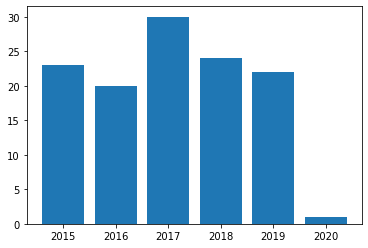

In [6]:
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt

fd = Counter(years)
print(fd)
plt.bar(fd.keys(), fd.values())
plt.show()

## Using APIs

### JSON as Tree Data Model
- MongoDB is JSON-style tree database
- JSON as Python dictionay of dictionaries of dictionaries ...

In [7]:
import json # Java Script Object Notation
serialized = """{ "title" : "Data Science Book",
                  "author" : "Joel Grus",
                  "publicationYear" : 2014,
                  "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)

In [8]:
deserialized['title']

'Data Science Book'

In [9]:
deserialized['author']

'Joel Grus'

In [10]:
deserialized['publicationYear']

2014

In [11]:
deserialized['topics']

['data', 'science', 'data science']

In [12]:
if "data science" in deserialized["topics"]:
    print(deserialized)

{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2014, 'topics': ['data', 'science', 'data science']}


- To install various parser:
    
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### XML as Tree Data Model

In [13]:
xml_text = """
<Book>
  <Title>Data Science Book</Title>
  <Author>Joel Grus</Author>
  <PublicationYear>2014</PublicationYear>
  <Topics>
    <Topic>data</Topic>
    <Topic>science</Topic>
    <Topic>data science</Topic>
  </Topics>
</Book>
"""

In [14]:
soup = BeautifulSoup(xml_text, 'lxml')

soup.book

<book>
<title>Data Science Book</title>
<author>Joel Grus</author>
<publicationyear>2014</publicationyear>
<topics>
<topic>data</topic>
<topic>science</topic>
<topic>data science</topic>
</topics>
</book>

Query 1: Find **title** of **book**

In [15]:
soup.book.title

<title>Data Science Book</title>

In [16]:
soup.book.title.text

'Data Science Book'

Query 2: Find **title**'s text of **book**

In [17]:
soup.book.title.text

'Data Science Book'

Query 3: Find **author** of **book**

In [18]:
soup.book.author

<author>Joel Grus</author>

Query 4: Find all **topic** under **topics**

In [19]:
soup.topics('topic')

[<topic>data</topic>, <topic>science</topic>, <topic>data science</topic>]

Query 5: Find second **topic**'s **text** of **topics** of **book**

In [20]:
soup.book.topics('topic')[1].text

'science'

In [23]:
soup.book.topics('topic')[2].text

'data science'

Query 6: Find last **topic** of **book**

In [24]:
soup.book('topic')[-1]

<topic>data science</topic>

Query 7: Loop over all **topic** of **book**

In [25]:
for i, topic in enumerate(soup.book('topic')):
    print('topic {}: {}'.format(i, topic.text))

topic 0: data
topic 1: science
topic 2: data science


(Overall Exercise)

Query 8: Find the **title**'s **text** of all **books**s whose **author** is 'Joel Grus' and **publicationyear** >= 2000

In [26]:
for book in soup('book'):
    if book.author.text == 'Joel Grus' and int(book.publicationyear.text) >= 2000:
        print(book.title.text)

Data Science Book


In [27]:
#same as upper code
for book in soup('book'):
    if book.author.text == 'Joel Grus' and int(book.publicationyear.text) >= 2000:
        print(book.title.text)

Data Science Book


In [31]:
book.publicationyear.text

'2014'

In [32]:
soup.topic

<topic>data</topic>

In [33]:
soup.topic.text

'data'

In [38]:
soup.topic

<topic>data</topic>

In [39]:
soup.find('topic')

<topic>data</topic>

In [40]:
soup.find_all('topic')

[<topic>data</topic>, <topic>science</topic>, <topic>data science</topic>]

In [41]:
soup.text

'\nData Science Book\nJoel Grus\n2014\n\ndata\nscience\ndata science\n\n\n'

### Using an Unauthenticated API

In [42]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"

repos = json.loads(requests.get(endpoint).text)
repos

[{'id': 112873601,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMTI4NzM2MDE=',
  'name': 'advent2017',
  'full_name': 'joelgrus/advent2017',
  'private': False,
  'owner': {'login': 'joelgrus',
   'id': 1308313,
   'node_id': 'MDQ6VXNlcjEzMDgzMTM=',
   'avatar_url': 'https://avatars1.githubusercontent.com/u/1308313?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/joelgrus',
   'html_url': 'https://github.com/joelgrus',
   'followers_url': 'https://api.github.com/users/joelgrus/followers',
   'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}',
   'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions',
   'organizations_url': 'https://api.github.com/users/joelgrus/orgs',
   'repos_url': 'https://api.github.com/users/joelgrus/repos',
   'events_url': 'https://api.github.com/users/

In [43]:
from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

print(month_counts)
print(weekday_counts)

Counter({11: 5, 12: 4, 9: 4, 7: 4, 2: 3, 1: 3, 5: 3, 8: 2, 6: 1, 4: 1})
Counter({4: 7, 2: 7, 1: 5, 5: 4, 6: 4, 3: 2, 0: 1})


In [44]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]

last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

last_5_languages

['Python', None, 'Python', 'Python', 'HTML']

### Finding APIs

- Try searching the Web for “python __ api” to find a library
- Klout API, Yelp API, IMDB API, and so on.
- <a href="http://bit.ly/1L35VOR">Python for Beginners</a>
- <a href="http://www.programmableweb.com">Programmable Web</a>
- <a href="https://www.data.go.kr/">공공데이터포털</a>

- Big Data: API의 시대

https://www.data.go.kr/dataset/15000583/openapi.do

https://www.data.go.kr/dataset/15003419/fileData.do

## Example: Using the Twitter APIs

### Getting Credentials

1. Go to https://apps.twitter.com/.
2. If you are not signed in, click Sign in and enter your Twitter username and password.
3. Click Create New App.
4. Give it a name (such as “Data Science”) and a description, and put any URL as the website (it doesn’t matter which one).
5. Agree to the Terms of Service and click Create.
6. Take note of the consumer key and consumer secret.
7. Click “Create my access token.”
8. Take note of the access token and access token secret (you may have to refresh the page).

### Using Twython

- First we’ll look at the Search API, which requires only the consumer key and secret, not the access token or secret
- Twitter search:
    - https://developer.twitter.com/en/docs/tweets/search/overview
- Twitter search API data format:
    - https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets.html

install twython

In [ ]:
CONSUMER_KEY="....."
CONSUMER_SECRET="....."

In [ ]:
from twython import Twython

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

# search for tweets containing the phrase "data science"
for status in twitter.search(q='"trump"')["statuses"]:
    user = status["user"]["screen_name"].encode('utf-8')
    text = status["text"].encode('utf-8')
    print(user, ":", text)
    print()

In [ ]:
from twython import Twython

# fill these in if you want to use the code
CONSUMER_KEY = "..."
CONSUMER_SECRET = "..."
ACCESS_TOKEN = "..."
ACCESS_TOKEN_SECRET = "..."

def call_twitter_search_api():

    twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

    # search for tweets containing the phrase "data science"
    for status in twitter.search(q='"data science"')["statuses"]:
        user = status["user"]["screen_name"].encode('utf-8')
        text = status["text"].encode('utf-8')
        print(user, ":", text)
        print()

from twython import TwythonStreamer

# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""

    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python object representing a tweet"""

        # only want to collect English-language tweets
        if data['lang'] == 'en':
            tweets.append(data)

        # stop when we've collected enough
        #if len(tweets) >= 1000:
        if len(tweets) >= 10:
            self.disconnect()

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

def call_twitter_streaming_api():
    stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                        ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

    # starts consuming public statuses that contain the keyword 'data'
    stream.statuses.filter(track='trump')


In [ ]:
def call_twitter_search_api():

    twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

    # search for tweets containing the phrase "data science"
    for status in twitter.search(q='"김정은"')["statuses"]:
        user = status["user"]["screen_name"]
        text = status["text"]
        print(user, ":", text)
        print()

In [ ]:
for status in twitter.search(q='"손흥민"')["statuses"]:
    user = status["user"]["screen_name"]
    text = status["text"]
    print(user, ":", text)
    print()